In [1]:
import numpy as np 

#Plotting Package 
import matplotlib.pyplot as plt 

#odeint is the numerical integration of ODEs through the scipy package
from scipy.integrate import odeint

#The line below may not be explicitly required. In older versions of JupyterNotebook it was required
#in order ot show the plot on the screen. 
%matplotlib inline 

# Plotting Example 
I am going solve and plot the predator pray model (LOTKA-VOLTERRA) where the predator pray model is as follows: 

Rabbits -> 2 Rabbits 

Fox + Rabbit -> 2 Fox 

Fox -> 0 

In [51]:
#Python function with the ODEs explicitly set 
def LotkaVolterraModel(Y,T,RabbitReproduction,FoxReproduction,RabbitDeath,FoxDeath): 
    rabbit,fox = Y #Tuple unpacking (rabbit,fox)
    
    rabbit_ode = RabbitReproduction*rabbit - RabbitDeath*rabbit*fox #= rabbit'(t) 
    fox_ode    = FoxReproduction*rabbit*fox - FoxDeath*fox          #= fox'(t)
    
    dydt = [rabbit_ode,fox_ode] #Order of ODE must match the order specified in Y 
    
    return dydt
    

    
#Parameters for model 
rabbit_reproduction = 1.1  #Rate of rabbit reproduction 
fox_reproduction = 0.1     #Rate of fox reproduction dependent upon the rabbit and fox  population
rabbit_death = 0.4         #Rate of rabbit reproduction based off of fox and rabbit population 
fox_death = 0.1            #Rate of fox death 

#Initial Conditions; 
rabbit_0 = 10 #Number of rabbits at time = 0 
fox_0    = 10 #Number of foxes at time = 0 

#Initial Condition in format needed for scipy 
y_0  = [rabbit_0,fox_0] #Rabbit must be in the 0th index and fox in 1st index based off of how we seet the Y 
                        #in the tuple unpacking step in the python function above. 
    

#Create the time array 
n_points = 200
simulation_max = 100 
t = np.linspace(0,simulation_max,n_points) #Creates an array with 200 equally spaced values between 0 and 100 


#Solving the ODE 
y = odeint(LotkaVolterraModel, y_0, t, args=(rabbit_reproduction,fox_reproduction,
                                               rabbit_death,fox_death))

#y is a n_points X 2 numpy matrix
#Time goes down the column
#              Rabbits           Fox 
#y = array(([[1.00000000e+01, 1.00000000e+01],
#            [2.58119723e-01, 1.20293409e+01],
#            [7.52094379e-03, 1.09493754e+01],
#            [3.39668842e-04, 9.89965002e+00],
#           [2.29803469e-05, 8.94863355e+00],
#           [2.23973613e-06, 8.08889085e+00],
#         .... 
#          ...                         ))

#Reminder, first column is the rabbit because that is how it was defined in the 
#LotkaVolterraModel function. 
rabbit = y[:,0] #Matrix slice, getting all rows and first column 
fox  = y[:,1] #Matrix slice, getting all rows and second column 


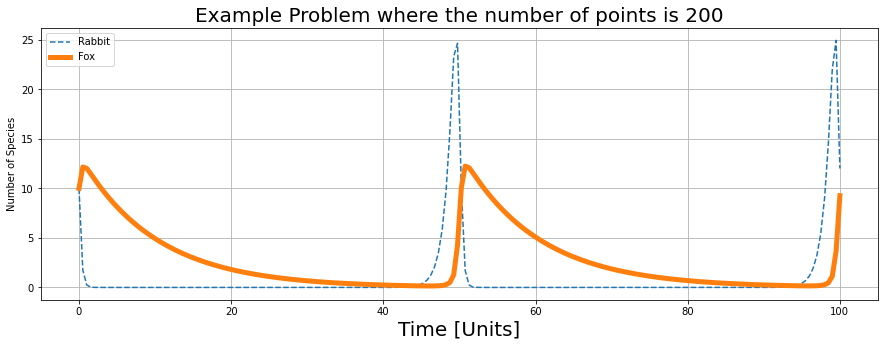

In [54]:
#Plotting 
plt.figure(figsize=(15,5))        #This intializes the figure and sets the size to be 15 X 5 (Width * Height)
plt.plot(t,rabbit,label="Rabbit",linestyle='--') #Plots rabbit numbers as a function of time. Label attaches the legend 
plt.plot(t,fox,label="Fox",linewidth=5)       #Same as above but for foxes
plt.grid()                        #Adds grid to the plot 
plt.xlabel("Time [Units]",size=20)        #Adds the x_label and change the font size
plt.ylabel("Number of Species",size=10)
plt.legend(loc='best')
plt.title("Example Problem where the number of points is {}".format(n_points),size=20)
plt.show() #Not necessary but removes extraneous text from being displayed